In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
df['Price']=data.target

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
df=df.sample(frac=0.20)

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
y

,Price
5291,5.00001
3416,1.45800
12770,0.78000
11840,0.70900
14379,2.47700
...,...
832,1.59800
12587,1.91900
8303,4.61500
2975,1.06300


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.41909529323188477

Hyperparameter Tunning

In [ ]:
parameter= {'criterion':['squared_error','poissor'],
            'max_depth':[1,2,3,4,6,7,8],
            'splitter':['best','random'],
            'max_features':['squrt','log2']
            }

reg = DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(reg,param_grid=parameter,cv=5,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 7, 8],
                         'max_features': ['squrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'poissor'],
                         'max_depth': [1, 2, 3, 4, 6, 7, 8],
                         'max_features': ['squrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
final_model = DecisionTreeRegressor(criterion='squared_error',max_depth=7,max_features='log2',splitter='best')
final_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=7, max_features='log2')

[Text(0.5170925414364641, 0.9375, 'x[0] <= 5.151\nsquared_error = 1.326\nsamples = 3302\nvalue = 2.071'),
 Text(0.3028314917127072, 0.8125, 'x[6] <= 38.485\nsquared_error = 0.838\nsamples = 2636\nvalue = 1.745'),
 Text(0.40996201657458564, 0.875, 'True  '),
 Text(0.17679558011049723, 0.6875, 'x[0] <= 3.073\nsquared_error = 0.858\nsamples = 2321\nvalue = 1.827'),
 Text(0.08839779005524862, 0.5625, 'x[0] <= 2.317\nsquared_error = 0.581\nsamples = 1029\nvalue = 1.401'),
 Text(0.04419889502762431, 0.4375, 'x[5] <= 2.38\nsquared_error = 0.546\nsamples = 514\nvalue = 1.209'),
 Text(0.022099447513812154, 0.3125, 'x[5] <= 1.931\nsquared_error = 1.188\nsamples = 103\nvalue = 1.684'),
 Text(0.011049723756906077, 0.1875, 'x[5] <= 1.919\nsquared_error = 1.288\nsamples = 37\nvalue = 2.008'),
 Text(0.0055248618784530384, 0.0625, 'squared_error = 1.068\nsamples = 36\nvalue = 1.925'),
 Text(0.016574585635359115, 0.0625, 'squared_error = -0.0\nsamples = 1\nvalue = 5.0'),
 Text(0.03314917127071823, 0.18

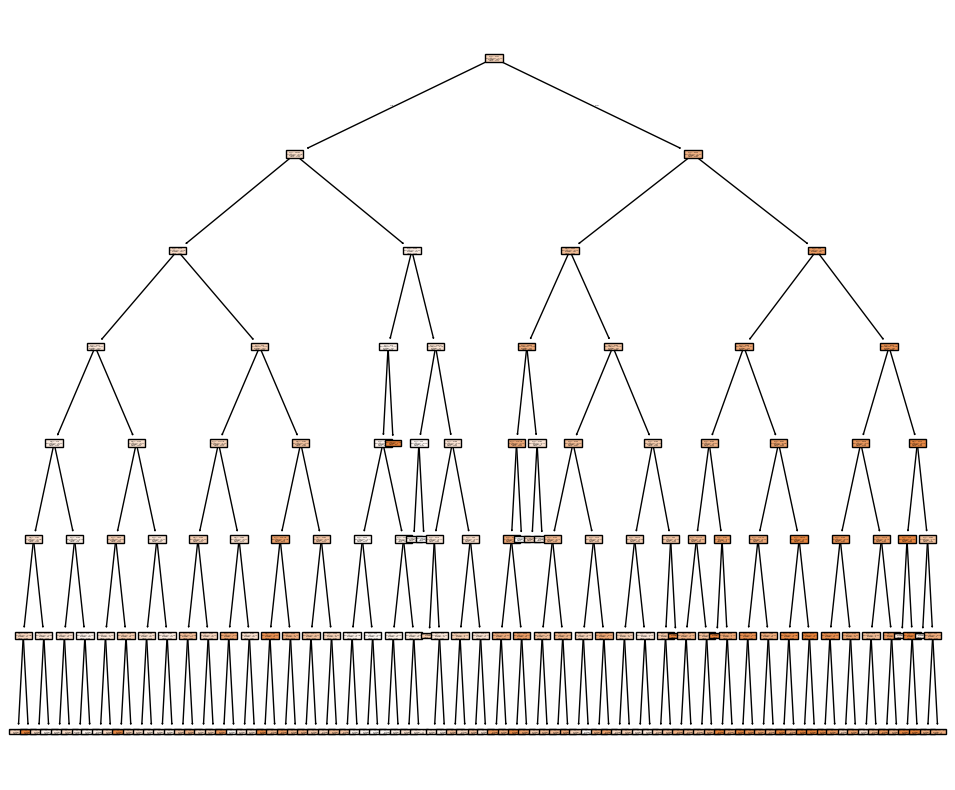

In [ ]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(final_model,filled=True)

In [ ]:
y_pred=final_model.predict(x_test)

In [ ]:
r2_score(y_test,y_pred)

0.5421067936084383

SVM regression is quite fast as comapre to decision tree regression